# Exploration of Embeddings

1. Projecting both Abstracts & Eyewitness reports into the same space
2. Cluter anlaysis
3. LDA/LSA on original text of notable clusters (if any) for theme analysis?

In [62]:
import pandas as pd
import numpy as np

In [69]:
# Read data
merged_df = pd.read_csv('/Users/ez/Desktop/text_memory_and_identity/exploration/all_data_norm_0310.csv', index_col=0)

In [75]:
print(merged_df.shape)
print(type(merged_df['embedding_mm_norm_l'][0]))
merged_df[:2]

(700, 14)
<class 'str'>


,id,source,text,embedding,sents_token,sents_sample,frames,frames_list,embedding_list,embedding_norm,embedding_array,embedding_mm_norm,embedding_L2_norm,embedding_mm_norm_l
0,03299a0bcddf7cec7bb8587c87af598a30cf6f24,abstracts,Marceline Loridan-Ivens may be best known for ...,"[0.0129690608009696, 0.04015115275979042, -0.0...","[""Marceline Loridan-Ivens may be best known fo...","['She was also a Holocaust survivor, who retur...","['Perception_experience', 'Text_creation', 'Me...","['Perception_experience', 'Text_creation', 'Me...","[0.0129690608009696, 0.04015115275979042, -0.0...","[0.012969060434072206, 0.04015115162390606, -0...",[ 0.01296906 0.04015115 -0.00929008 ... -0.02...,[0.64200142 0.54096378 0.36122134 ... 0.193351...,1.0,"[0.6420014164491945, 0.5409637845858435, 0.361..."
1,adb692013a60e1a7eb79ca4759e92fd5245a4f2d,abstracts,"How do extraordinary experiences, especially d...","[-0.01149928942322731, 0.04745658487081528, -0...","['How do extraordinary experiences, especially...",['He then conducts semi-structured interviews ...,"['Discussion', 'Participation', 'Purpose', 'Sc...","['Discussion', 'Participation', 'Purpose', 'Sc...","[-0.01149928942322731, 0.04745658487081528, -0...","[-0.011499288726181826, 0.04745658199416813, -...",[-0.01149929 0.04745658 -0.00236056 ... -0.01...,[0.47926776 0.61672966 0.40478131 ... 0.236576...,1.0,"[0.47926776241412294, 0.6167296586592516, 0.40..."


In [71]:
import ast
# Transform type
def transform_str_to_list(cell):
    """
    Identifies a string representation of a list, and turns this into a list literal.

    Inputs:
        (cell): the content of a cell in a df to evaluate.
    
    Returns: (list)
    """
    str_to_list = ast.literal_eval(cell)

    return str_to_list

In [72]:
merged_df_expanded = pd.DataFrame(merged_df['embedding_mm_norm_l'].apply(lambda x: transform_str_to_list(x)).to_list())

In [76]:
# Set index
merged_df_expanded = merged_df_expanded.set_index(merged_df['source'])

In [77]:
merged_df_expanded[:2]

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
source,,,,,,,,,,,,,,,,,,,,,
abstracts,0.642001,0.540964,0.361221,0.362495,0.328073,0.454908,0.728157,0.687078,0.420869,0.528267,...,0.346111,0.643175,0.317830,0.324917,0.592702,0.515882,0.687069,0.193352,0.51679,0.484355
abstracts,0.479268,0.616730,0.404781,0.701302,0.372249,0.623796,0.609352,0.690641,0.519569,0.703815,...,0.421798,0.786273,0.254345,0.433124,0.512738,0.354330,0.598297,0.236577,0.42650,0.376493


### Viz

In [78]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

Dimension reduction - choosing number of components

In [79]:
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=50)

# Fit and transform the embeddings using TSNE
embeddings_2d = tsne.fit_transform(merged_df_expanded)

# Create a DataFrame for the 2D embeddings
embedding_2d_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'], index=merged_df_expanded.index)

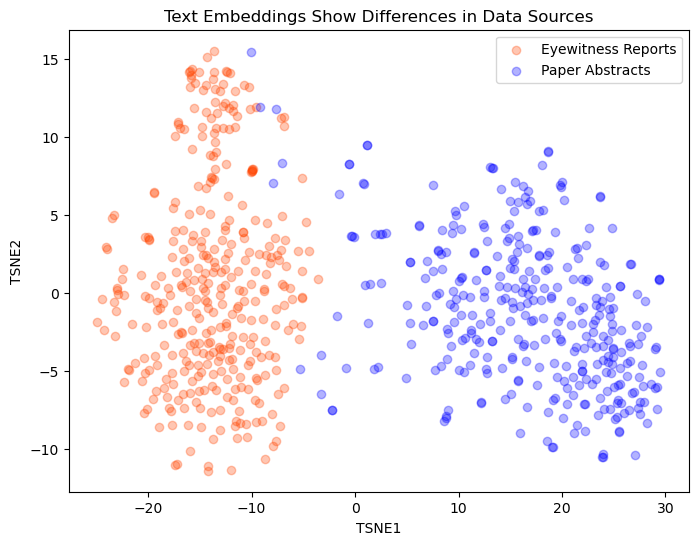

In [84]:
# Visualize the embeddings using TSNE

# Set colors
colordict = {
    "eyewitness": 'orangered',
    "abstracts": 'blue'
}
colors = [colordict[c] for c in merged_df_expanded.index]

# Plot the 2D embeddings
plt.figure(figsize=(8, 6))

# Scatter plot for Eyewitness Reports
plt.scatter(embedding_2d_df['x'][merged_df_expanded.index == "eyewitness"], 
            embedding_2d_df['y'][merged_df_expanded.index == "eyewitness"], 
            color='orangered', alpha=0.3, label='Eyewitness Reports')

# Scatter plot for Paper Abstracts
plt.scatter(embedding_2d_df['x'][merged_df_expanded.index == "abstracts"], 
            embedding_2d_df['y'][merged_df_expanded.index == "abstracts"], 
            color='blue', alpha=0.3, label='Paper Abstracts')

plt.title('Text Embeddings Show Differences in Data Sources')
plt.legend()
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

OLD: 
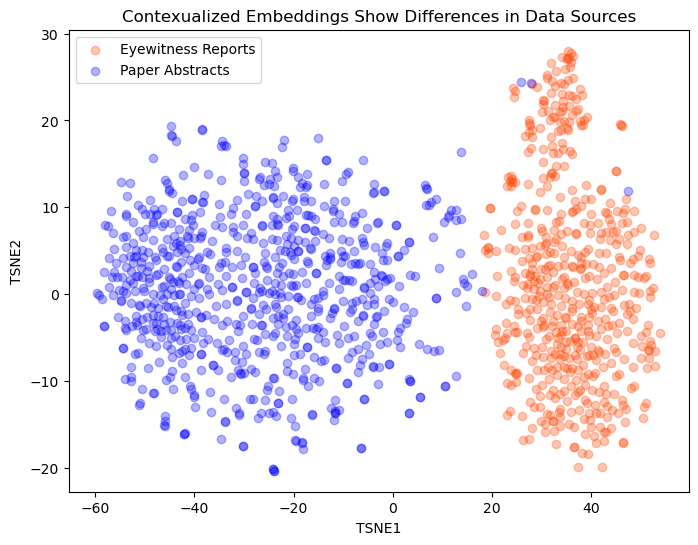

Make this orange and yellow from L -> R...it will resemble ernie & bert LOL.

Wow! I did NOT expect these sources to be so diverse. This could be due to a number of factors: 
* writing style, content, etc.
* my search for academic texts using the keywords "holocause survivors interview" was too restrictive.
* the content and underlying intention are completely different

Since these clusters are SO distinct, I will continue this exploration with the two sources separate.

In [73]:
eyewitness_expanded = merged_df_expanded[merged_df_expanded.index == 1]
abstracts_expanded = merged_df_expanded[merged_df_expanded.index == 0]

eyewitness_expanded.reset_index(drop=True, inplace=True)
abstracts_expanded.reset_index(drop=True, inplace=True)

### Explore clusters
The goal here is to uncover similarities and differences of themes 
within each source type.

First steps
* k-means
* find ideal number of clusters

Next steps
* analyze resulting clusters using LSA/LDA on original text to get topics/themes
* analyze themes (qualitatively, visually)

In [103]:
import sklearn.cluster
import sklearn.feature_extraction.text

import numpy as np
import sklearn.metrics.pairwise

In [67]:
# Initialize cluster finder
km = sklearn.cluster.KMeans(n_clusters=5, init='k-means++')

In [74]:
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=50)

# Fit and transform the embeddings using TSNE
eyewitness_embeddings_2d = tsne.fit_transform(eyewitness_expanded)

km.fit(eyewitness_embeddings_2d)

/Users/ez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [85]:
# Save Kmeans cluster number

# Method 1
# # Convert the labels array to a DataFrame
# labels_df = pd.DataFrame(km.labels_, columns=['kmeans_predictions'])

# # Concatenate the labels DataFrame with `eyewitness_embeddings_2d`
# eyewitness_embeddings_2d = pd.concat([eyewitness_embeddings_2d, labels_df], axis=1)

# Method 2
eyewitness_expanded['kmeans_predictions'] = km.labels_

/var/folders/3q/0f9bqcgn3lg9b61gvs47l33r0000gn/T/ipykernel_33117/3111509270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eyewitness_expanded['kmeans_predictions'] = km.labels_


The categories' colors are:
dict_items([(0, 'red'), (1, 'orange'), (2, 'green'), (3, 'blue'), (4, 'pink')])


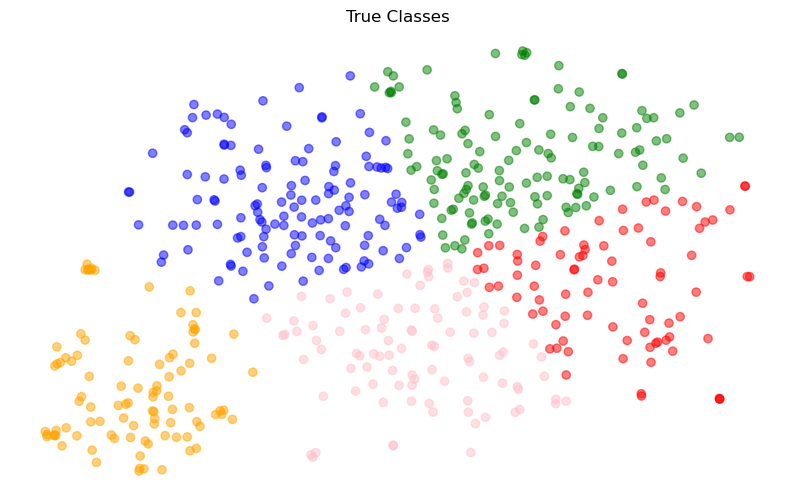

In [89]:
# Visualize
colordict = {
0: 'red',
1: 'orange',
2: 'green',
3: 'blue',
4: 'pink'
    }
colors = [colordict[c] for c in eyewitness_expanded['kmeans_predictions']]
print("The categories' colors are:\n{}".format(colordict.items()))

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(eyewitness_embeddings_2d[:, 0], eyewitness_embeddings_2d[:, 1], 
                            color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

# plt.title('Contexualized Embeddings Show Differences in Data Sources')
# plt.legend()
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.show()

These clusters are meaningless. The embeddings themselves already represent distance and similarity between points. Kmeans is just locating points based on Euclidean closeness in multidimensional space. This is not useful.

I don't have any particular clusters in mind. This technique is completely wasted on such a exercise. TLDR: YOU NEED MEANINGFUL, LABELED POINTS BEFORE CONDUCTING KMEANS/CLUSTERING.

### Viz - Cosine Similarity between Random Sample of Docs

In [92]:
eyewitness_expanded.drop(columns=['kmeans_predictions'], inplace=True)

/var/folders/3q/0f9bqcgn3lg9b61gvs47l33r0000gn/T/ipykernel_33117/290373833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eyewitness_expanded.drop(columns=['kmeans_predictions'], inplace=True)


In [98]:
# Add id as index
eyewitness_expanded = eyewitness_expanded.set_index(eyewitness['Index Number'])

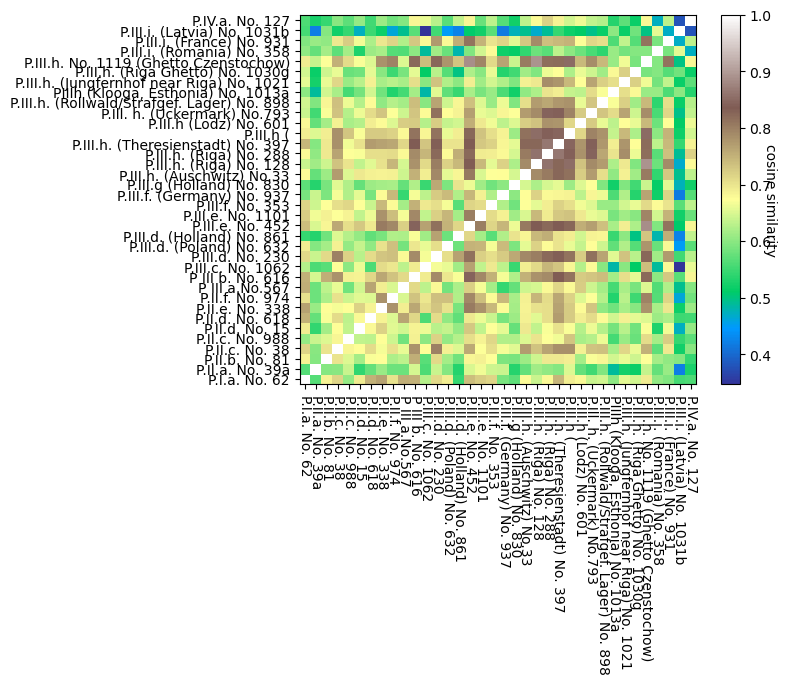

In [128]:
# Assuming the first 10 rows represent the target documents and embeddings are in separate columns
targetDocs = eyewitness_expanded.index[::15]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = eyewitness_expanded.loc[tagOuter].values.reshape(1, -1)  # Get the embedding vector for the target document
    for tagInner in targetDocs:
        innerVec = eyewitness_expanded.loc[tagInner].values.reshape(1, -1)  # Get the embedding vector for the inner document
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, innerVec)[0][0])
    heatmapMatrixD.append(column)

heatmapMatrixD = np.array(heatmapMatrixD)

fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(targetDocs, minor=False, rotation=270)
ax.set_yticklabels(targetDocs, minor=False)
plt.show()

Overall, the documents in this corpus are noticeably more similar than unsimilar to one another (all values are > 0.5).

This would make sense, given that these eyewitness reports given by Holocaust survivors should touch upon some similar sentiment, agents, themes, etc.

In [110]:
# Repeat with Abstracts docs

# Add id as index
# abstracts_expanded = abstracts_expanded.set_index(abstracts['paper_ID'])

# Reset index, since the IDs are hard to read anyway
abstracts_expanded.reset_index(drop=True, inplace=True)

<Figure size 1000x1000 with 0 Axes>

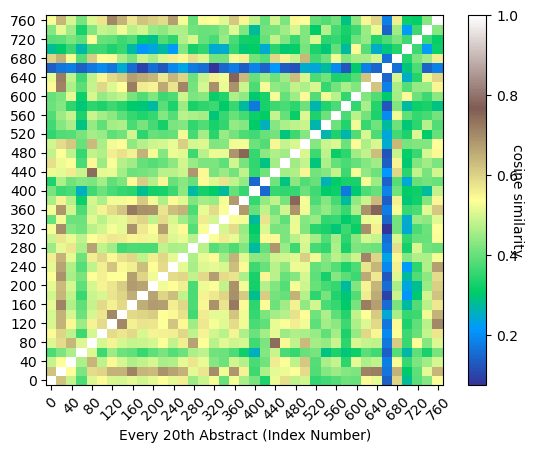

In [127]:
# Assuming the first 10 rows represent the target documents and embeddings are in separate columns
targetDocs = abstracts_expanded.index[::20]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = abstracts_expanded.loc[tagOuter].values.reshape(1, -1)  # Get the embedding vector for the target document
    for tagInner in targetDocs:
        innerVec = abstracts_expanded.loc[tagInner].values.reshape(1, -1)  # Get the embedding vector for the inner document
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, innerVec)[0][0])
    heatmapMatrixD.append(column)

heatmapMatrixD = np.array(heatmapMatrixD)

fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
ax.set_xticks(np.arange(0, heatmapMatrixD.shape[1], 2) + 0.5, minor=False)  # Show every other tick on the x-axis
ax.set_yticks(np.arange(0, heatmapMatrixD.shape[0], 2) + 0.5, minor=False)  # Show every other tick on the y-axis
ax.set_xticklabels(targetDocs[::2], minor=False, rotation=45)  # Adjust the x-axis tick labels
ax.set_yticklabels(targetDocs[::2], minor=False)  # Adjust the y-axis tick labels
plt.xlabel('Every 20th Abstract (Index Number)')
plt.show()


Abstracts are noticeably (visually) less similar to one another than eyewitness reports are to each other.

#### Normalize Embeddings - length of vectors

In [7]:
import numpy as np

In [3]:
all_embeddings = pd.read_csv('/Users/ez/Desktop/text_memory_and_identity/data collection/eyewitness_abstracts_frame_list.csv', index_col=0)

In [4]:
print(all_embeddings.shape)
all_embeddings[:2]

(700, 8)


,id,source,text,embedding,sents_token,sents_sample,frames,frames_list
0,03299a0bcddf7cec7bb8587c87af598a30cf6f24,abstracts,Marceline Loridan-Ivens may be best known for ...,"[0.0129690608009696, 0.04015115275979042, -0.0...","[""Marceline Loridan-Ivens may be best known fo...","['She was also a Holocaust survivor, who retur...","['Perception_experience', 'Text_creation', 'Me...","['Perception_experience', 'Text_creation', 'Me..."
1,adb692013a60e1a7eb79ca4759e92fd5245a4f2d,abstracts,"How do extraordinary experiences, especially d...","[-0.01149928942322731, 0.04745658487081528, -0...","['How do extraordinary experiences, especially...",['He then conducts semi-structured interviews ...,"['Discussion', 'Participation', 'Purpose', 'Sc...","['Discussion', 'Participation', 'Purpose', 'Sc..."


In [43]:
# Compare max and min for each of the dimensions in my embedding list
# Plot histogram for a random few of the dimensions

one_dimension = []
for index, row in all_embeddings.iterrows():
    one_dimension.append(row['embedding_list'][1250])

(array([  2.,  20.,  71., 169., 185., 125.,  74.,  39.,  11.,   4.]),
 array([-0.04410426, -0.03366265, -0.02322103, -0.01277941, -0.00233779,
         0.00810383,  0.01854544,  0.02898706,  0.03942868,  0.0498703 ,
         0.06031191]),
 <BarContainer object of 10 artists>)

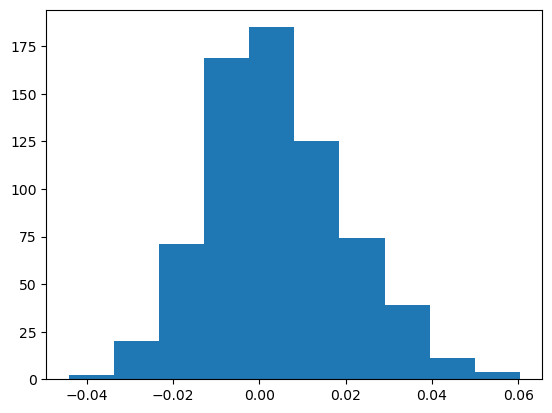

In [44]:
import matplotlib.pyplot as plt

plt.hist(one_dimension)

Not normalized.

Min-Max Norm:

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [61]:
# Need to first convert list of floats into array
all_embeddings['embedding_array'] = all_embeddings['embedding_list'].apply(lambda x: np.array(x))

In [64]:
all_embeddings['embedding_array'][0].shape

(1536,)

In [65]:
# Fit and transform the embeddings
embedding_mm_norm = scaler.fit_transform(np.stack(all_embeddings['embedding_array']))

# Assign the normalized embeddings back to the DataFrame
all_embeddings['embedding_mm_norm'] = list(embedding_mm_norm)

(array([  8.,  33.,  74., 143., 208., 130.,  68.,  27.,   8.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

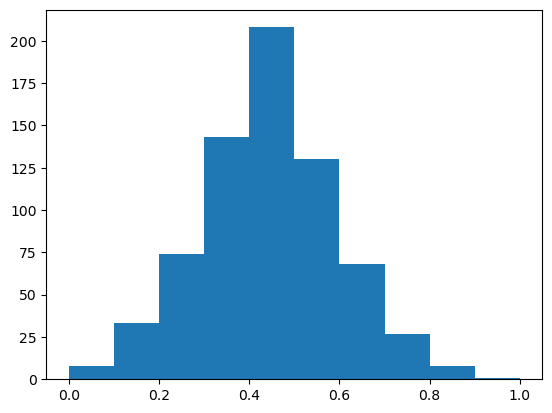

In [68]:
one_dimension = []
for index, row in all_embeddings.iterrows():
    one_dimension.append(row['embedding_mm_norm'][125])
plt.hist(one_dimension)

#### L2 Norm

In [114]:
# def normalize_embeddings(embeddings_array):
#     """
#     Normalize a list of embeddings using L2 normalization.

#     Args:
#         embeddings_array (numpy.ndarray): 1D array of embedding vector.

#     Returns:
#         numpy.ndarray: Normalized embedding vector.
#     """
#     # Calculate the L2 norm for the embedding vector
#     norm = np.linalg.norm(embeddings_array)

#     # Avoid division by zero
#     if norm == 0:
#         return None

#     # Normalize the embedding
#     normalized_embedding = embeddings_array / norm

#     return normalized_embedding


def l2_norm(vector):
    """
    Calculate the L2 norm of a vector.

    Args:
        vector (numpy.ndarray): 1D array representing a vector.

    Returns:
        float: L2 norm of the vector.
    """
    return np.sqrt(np.sum(vector**2))


# def normalize_embeddings(embeddings_array):
#     """
#     Normalize a list of embeddings using L2 normalization.

#     Args:
#         embeddings_array (numpy.ndarray): Array of embedding vectors.

#     Returns:
#         numpy.ndarray: Normalized embedding vectors.
#     """
#     # Calculate the L2 norm for the embedding vectors along the specified axis
#     norms = np.linalg.norm(embeddings_array, axis=1, keepdims=True)
    
#     # Avoid division by zero
#     norms[norms == 0] = 1
    
#     # Normalize the embedding vectors
#     normalized_embeddings = embeddings_array / norms

#     return normalized_embeddings

# # Example usage:
# embeddings = np.array([[0.0023, 0.08, -0.014], [0.045, 0.078, -0.0016], [7, 8, 9]])
# normalized_embeddings = normalize_embeddings(embeddings)
# print(normalized_embeddings)


L2 norm not being calculated properly.

In [95]:
# all_embeddings['embedding_array'] = all_embeddings['embedding_list'].apply(np.array)

In [118]:
all_embeddings['embedding_L2_norm'] = all_embeddings['embedding_array'].apply(l2_norm)

In [119]:
all_embeddings[:2]

,id,source,text,embedding,sents_token,sents_sample,frames,frames_list,embedding_list,embedding_norm,embedding_array,embedding_mm_norm,embedding_L2_norm
0,03299a0bcddf7cec7bb8587c87af598a30cf6f24,abstracts,Marceline Loridan-Ivens may be best known for ...,"[0.0129690608009696, 0.04015115275979042, -0.0...","[""Marceline Loridan-Ivens may be best known fo...","['She was also a Holocaust survivor, who retur...","['Perception_experience', 'Text_creation', 'Me...","['Perception_experience', 'Text_creation', 'Me...","[0.0129690608009696, 0.04015115275979042, -0.0...","[0.012969060434072206, 0.04015115162390606, -0...","[0.0129690608009696, 0.04015115275979042, -0.0...","[0.6420014164491945, 0.5409637845858435, 0.361...",1.0
1,adb692013a60e1a7eb79ca4759e92fd5245a4f2d,abstracts,"How do extraordinary experiences, especially d...","[-0.01149928942322731, 0.04745658487081528, -0...","['How do extraordinary experiences, especially...",['He then conducts semi-structured interviews ...,"['Discussion', 'Participation', 'Purpose', 'Sc...","['Discussion', 'Participation', 'Purpose', 'Sc...","[-0.01149928942322731, 0.04745658487081528, -0...","[-0.011499288726181826, 0.04745658199416813, -...","[-0.01149928942322731, 0.04745658487081528, -0...","[0.47926776241412294, 0.6167296586592516, 0.40...",1.0


(array([  4.,  30.,  79., 121., 149., 137.,  89.,  70.,  18.,   3.]),
 array([0.99999991, 0.99999993, 0.99999995, 0.99999997, 1.        ,
        1.00000002, 1.00000004, 1.00000006, 1.00000008, 1.0000001 ,
        1.00000012]),
 <BarContainer object of 10 artists>)

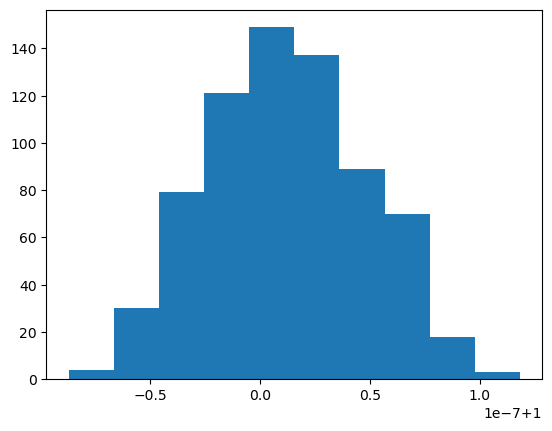

In [123]:
one_dimension = []
for index, row in all_embeddings.iterrows():
    one_dimension.append(row['embedding_L2_norm'])
plt.hist(one_dimension)

In [125]:
# Save!
# all_embeddings.to_csv('all_data_norm_0310.csv')